In [90]:
#Import packages
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

## Crime dataset and classify crime type

In [83]:
#read crime dataset 
df = pd.read_csv("Crime.csv")

In [84]:
#classify crime code descriptions into 4 lists represent 4 types of crime

#Felonies crime list
felonies = ['VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' , 'RAPE, FORCIBLE', 'THEFT OF IDENTITY' ,'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',  'BURGLARY', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',  'BURGLARY, ATTEMPTED', 'DOCUMENT FORGERY / STOLEN FELONY', 'CRIMINAL HOMICIDE',  'ATTEMPTED ROBBERY',  'DRUGS, TO A MINOR', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',  'BURGLARY FROM VEHICLE, ATTEMPTED', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE - ATTEMPT','RAPE, ATTEMPTED','EXTORTION','CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'OTHER ASSAULT', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'KIDNAPPING - GRAND ATTEMPT','SHOTS FIRED AT INHABITED DWELLING','EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',  'VIOLATION OF TEMPORARY RESTRAINING ORDER', 
'DISCHARGE FIREARMS/SHOTS FIRED', 'LYNCHING' , 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',   'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT', 'PIMPING',  'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',  'LYNCHING - ATTEMPTED',  'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',  'BOAT - STOLEN',  'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS' ,  'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',  'FIREARMS RESTRAINING ORDER (FIREARMS RO)',  'PANDERING', 'ARSON', 'CONSPIRACY',  'WEAPONS POSSESSION/BOMBING' ,  'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'BRIBERY',  'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'KIDNAPPING']  # List of felony crimes

#Wobblers crime list
wobblers = ['SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'VEHICLE - STOLEN', 'BOMB SCARE',  'CHILD STEALING', 'STALKING',  'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',  'ORAL COPULATION',  'TILL TAP - GRAND THEFT ($950.01 & OVER)',  'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',  'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'CREDIT CARDS, FRAUD USE ($950 & UNDER',  'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',  'DRIVING WITHOUT OWNER CONSENT (DWOC)', 'BIGAMY',  'CHILD ANNOYING (17YRS & UNDER)',  'BUNCO, ATTEMPT',  'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT','THEFT PLAIN - ATTEMPT',  'THEFT FROM PERSON - ATTEMPT',  'COUNTERFEIT',  'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',  'GRAND THEFT / AUTO REPAIR', 'DISHONEST EMPLOYEE - GRAND THEFT', 'CHILD PORNOGRAPHY', 'BATTERY ON A FIREFIGHTER',  'DOCUMENT WORTHLESS ($200.01 & OVER)',  'CRUELTY TO ANIMALS', 'MANSLAUGHTER, NEGLIGENT', 'BATTERY WITH SEXUAL CONTACT',  'PURSE SNATCHING - ATTEMPT', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',  'GRAND THEFT / INSURANCE FRAUD', 'TELEPHONE PROPERTY - DAMAGE', 'VEHICLE - ATTEMPT STOLEN', 'VIOLATION OF RESTRAINING ORDER']

#Misdemeanors crime list
misdemeanors = ['BATTERY - SIMPLE ASSAULT',  'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)','THEFT, COIN MACHINE - PETTY ($950 & UNDER)',  'OTHER MISCELLANEOUS CRIME','THEFT PLAIN - PETTY ($950 & UNDER)',  'INTIMATE PARTNER - SIMPLE ASSAULT' , 'BIKE - STOLEN', 'BATTERY POLICE (SIMPLE)',  'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)','BRANDISH WEAPON',  'BUNCO, GRAND THEFT', 'BUNCO, PETTY THEFT',  'TRESPASSING',  'PICKPOCKET, ATTEMPT', 'SHOPLIFTING - ATTEMPT', 'PICKPOCKET',  'VIOLATION OF COURT ORDER', 'THROWING OBJECT AT MOVING VEHICLE', 'PETTY THEFT - AUTO REPAIR',  'FAILURE TO YIELD', 'INDECENT EXPOSURE',  'TILL TAP - PETTY ($950 & UNDER)',  'RESISTING ARREST',  'THREATENING PHONE CALLS/LETTERS',  'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT',  'UNAUTHORIZED COMPUTER ACCESS',  'PURSE SNATCHING', 'CHILD ABANDONMENT', 'DRUNK ROLL', 'DISHONEST EMPLOYEE - PETTY THEFT', 'FALSE IMPRISONMENT',  'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',  'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER', 'DOCUMENT WORTHLESS ($200 & UNDER)',  'PROWLER',  'PEEPING TOM' ,  'FALSE POLICE REPORT', 'RECKLESS DRIVING',  'BIKE - ATTEMPTED STOLEN' , 'FAILURE TO DISPERSE',  'CONTRIBUTING', 'INCITING A RIOT', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',  'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'DISHONEST EMPLOYEE ATTEMPTED THEFT',  'THEFT, COIN MACHINE - ATTEMPT',  'THEFT PLAIN - ATTEMPT',   'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',  'THEFT FROM PERSON - ATTEMPT',  'THEFT, PERSON']  # List of misdemeanor crimes

#Infractions crime list
infractions = ['ILLEGAL DUMPING' ,'DISTURBING THE PEACE','DISRUPT SCHOOL','REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)','BLOCKING DOOR INDUCTION CENTER']  # List of infraction crimes

In [86]:
#Function to classify crimes based on classified lists
def classify_crime(crime_name):
    if crime_name in felonies:
        return 'felony'
    elif crime_name in wobblers:
        return 'wobbler'
    elif crime_name in misdemeanors:
        return 'misdemeanor'
    elif crime_name in infractions:
        return 'infraction'
    else:
        return 'unknown'  #Handle crime names not in the provided lists

In [87]:
# Apply classify_crime function to crime dataset
df['crime_type'] = df['Crm Cd Desc'].apply(classify_crime)

In [88]:
# Count the number of crimes of each type in each area
crime_count = df.groupby(['AREA NAME', 'crime_type']).agg(count=pd.NamedAgg(column='crime_type', aggfunc='count')).reset_index()

## Main Model

In [89]:
#### Data
#Number of areas to allocate police officers
num_areas = 21

#Maximum available number of police officers
max_officers = 9000

#Chosen minimum ratio of police officers to residents
officer_rate = 1.8

# List of area names
area_name = crime_count['AREA NAME'].unique().tolist()

# List of population count aligned with area names list
population = [175000, 40000, 219136, 182214, 171000, 200000, 300000, 225849, 220000, 187739, 250000, 140000, 200000, 164961, 150000, 165000, 205112, 325000
, 228000, 196840, 251000] 

# Lists of crime counts of for each area
num_felonies = crime_count[crime_count['crime_type'] == 'felony']['count'].tolist() # List of felony counts for each area
num_wobblers = crime_count[crime_count['crime_type'] == 'wobbler']['count'].tolist()# List of wobbler counts for each area
num_misdemeanors = crime_count[crime_count['crime_type'] == 'misdemeanor']['count'].tolist() # List of misdemeanor counts for each area
num_infractions = crime_count[crime_count['crime_type'] == 'infraction']['count'].tolist() # List of infraction counts for each area

#Determine crime weight for each type of crime
weights = {
    'felony': 5,
    'wobbler': 3,
    'misdemeanor': 2,
    'infraction': 1
}

#Calculate weight crime scores
weighted_crime_scores = [
    weights['felony'] * num_felonies[i] +
    weights['wobbler'] * num_wobblers[i] +
    weights['misdemeanor'] * num_misdemeanors[i] +
    weights['infraction'] * num_infractions[i]
    for i in range(num_areas)
]

#Develop Optimization Model
m = gp.Model("police_allocation")
m.setParam("OutputFlag", 0) #Suppress noisy output

#Decision variables
x = m.addVars(num_areas, vtype="I", name="police_officers")


#Constraint: total police officers cannot exceed max_officers
m.addConstr(gp.quicksum(x[i] for i in range(num_areas)) <= max_officers, name="total_officers")

#Constraint: number of police officers must be higher than the minimum police rate in that division
for i in range(num_areas):
    min_officers = officer_rate / 1000 * population[i]
    m.addConstr(x[i] >= min_officers, name=f"min_officers_{i}")
    
#Constraint: ensure that the weighted crime score per officer is above a certain threshold
threshold = 0.0033
for i in range(num_areas):
    m.addConstr(x[i] >= threshold * weighted_crime_scores[i], name=f"crime_score_threshold_{i}")

#Objective function: maximize the crime rate coverage of police officers by each division
m.setObjective(gp.quicksum(x[i]*(weighted_crime_scores[i]/population[i]) for i in range(num_areas)), GRB.MAXIMIZE)

# Obtimize the model
m.optimize()

# Print the optimal solutions
print("Optimal police officer allocation:")
for i in range(num_areas):
    print(f"Area {area_name[i]}: {x[i].x} police officers")
    print(f"Area {area_name[i]}: {round(x[i].x/weighted_crime_scores[i],5)} weight crime score per officer division")
    print(f"Area {area_name[i]}: {round(x[i].x/population[i] * 1000,2)} proportion")

Optimal police officer allocation:
Area 77th Street: 533.0 police officers
Area 77th Street: 0.0033 weight crime score per officer division
Area 77th Street: 3.05 proportion
Area Central: 565.0 police officers
Area Central: 0.00338 weight crime score per officer division
Area Central: 14.12 proportion
Area Devonshire: 395.0 police officers
Area Devonshire: 0.00403 weight crime score per officer division
Area Devonshire: 1.8 proportion
Area Foothill: 328.0 police officers
Area Foothill: 0.00397 weight crime score per officer division
Area Foothill: 1.8 proportion
Area Harbor: 328.0 police officers
Area Harbor: 0.0033 weight crime score per officer division
Area Harbor: 1.92 proportion
Area Hollenbeck: 360.0 police officers
Area Hollenbeck: 0.00393 weight crime score per officer division
Area Hollenbeck: 1.8 proportion
Area Hollywood: 540.0 police officers
Area Hollywood: 0.00412 weight crime score per officer division
Area Hollywood: 1.8 proportion
Area Mission: 407.0 police officers
Ar

## Exploration model 1

In [91]:
#### Data
#Number of areas to allocate police officers
num_areas = 21

#Maximum available number of police officers
max_officers = 9000

#Chosen minimum ratio of police officers to residents
officer_rate = 1.8

# List of area names
area_name = crime_count['AREA NAME'].unique().tolist()

# List of population count aligned with area names list
population = [175000, 40000, 219136, 182214, 171000, 200000, 300000, 225849, 220000, 187739, 250000, 140000, 200000, 164961, 150000, 165000, 205112, 325000
, 228000, 196840, 251000] 

# Lists of crime counts of for each area
num_felonies = crime_count[crime_count['crime_type'] == 'felony']['count'].tolist() # List of felony counts for each area
num_wobblers = crime_count[crime_count['crime_type'] == 'wobbler']['count'].tolist()# List of wobbler counts for each area
num_misdemeanors = crime_count[crime_count['crime_type'] == 'misdemeanor']['count'].tolist() # List of misdemeanor counts for each area
num_infractions = crime_count[crime_count['crime_type'] == 'infraction']['count'].tolist() # List of infraction counts for each area

#Determine crime weight for each type of crime
weights = {
    'felony': 10,
    'wobbler': 6,
    'misdemeanor': 2,
    'infraction': 1
}

#Calculate weight crime scores
weighted_crime_scores = [
    weights['felony'] * num_felonies[i] +
    weights['wobbler'] * num_wobblers[i] +
    weights['misdemeanor'] * num_misdemeanors[i] +
    weights['infraction'] * num_infractions[i]
    for i in range(num_areas)
]

#Develop Optimization Model
m = gp.Model("police_allocation")
m.setParam("OutputFlag", 0) #Suppress noisy output

#Decision variables
x = m.addVars(num_areas, vtype="I", name="police_officers")


#Constraint: total police officers cannot exceed max_officers
m.addConstr(gp.quicksum(x[i] for i in range(num_areas)) <= max_officers, name="total_officers")

#Constraint: number of police officers must be higher than the minimum police rate in that division
for i in range(num_areas):
    min_officers = officer_rate / 1000 * population[i]
    m.addConstr(x[i] >= min_officers, name=f"min_officers_{i}")
    
#Constraint: ensure that the weighted crime score per officer is above a certain threshold
threshold = 0.0018
for i in range(num_areas):
    m.addConstr(x[i] >= threshold * weighted_crime_scores[i], name=f"crime_score_threshold_{i}")

#Objective function: maximize the crime rate coverage of police officers by each division
m.setObjective(gp.quicksum(x[i]*(weighted_crime_scores[i]/population[i]) for i in range(num_areas)), GRB.MAXIMIZE)

# Obtimize the model
m.optimize()

# Print the optimal solutions
print("Optimal police officer allocation:")
for i in range(num_areas):
    print(f"Area {area_name[i]}: {x[i].x} police officers")
    print(f"Area {area_name[i]}: {round(x[i].x/weighted_crime_scores[i],5)} weight crime score per officer division")
    print(f"Area {area_name[i]}: {round(x[i].x/population[i] * 1000,2)} proportion")

Optimal police officer allocation:
Area 77th Street: 532.0 police officers
Area 77th Street: 0.0018 weight crime score per officer division
Area 77th Street: 3.04 proportion
Area Central: 628.0 police officers
Area Central: 0.0021 weight crime score per officer division
Area Central: 15.7 proportion
Area Devonshire: 395.0 police officers
Area Devonshire: 0.00225 weight crime score per officer division
Area Devonshire: 1.8 proportion
Area Foothill: 328.0 police officers
Area Foothill: 0.0022 weight crime score per officer division
Area Foothill: 1.8 proportion
Area Harbor: 322.0 police officers
Area Harbor: 0.0018 weight crime score per officer division
Area Harbor: 1.88 proportion
Area Hollenbeck: 360.0 police officers
Area Hollenbeck: 0.00217 weight crime score per officer division
Area Hollenbeck: 1.8 proportion
Area Hollywood: 540.0 police officers
Area Hollywood: 0.00232 weight crime score per officer division
Area Hollywood: 1.8 proportion
Area Mission: 407.0 police officers
Area 

## Exploration model 2

In [92]:
#### Data
#Number of areas to allocate police officers
num_areas = 21

#Maximum available number of police officers
max_officers = 9000

#Chosen minimum ratio of police officers to residents
officer_rate = 1.8

# List of area names
area_name = crime_count['AREA NAME'].unique().tolist()

# List of population count aligned with area names list
population = [175000, 40000, 219136, 182214, 171000, 200000, 300000, 225849, 220000, 187739, 250000, 140000, 200000, 164961, 150000, 165000, 205112, 325000
, 228000, 196840, 251000] 

# Lists of crime counts of for each area
num_felonies = crime_count[crime_count['crime_type'] == 'felony']['count'].tolist() # List of felony counts for each area
num_wobblers = crime_count[crime_count['crime_type'] == 'wobbler']['count'].tolist()# List of wobbler counts for each area
num_misdemeanors = crime_count[crime_count['crime_type'] == 'misdemeanor']['count'].tolist() # List of misdemeanor counts for each area
num_infractions = crime_count[crime_count['crime_type'] == 'infraction']['count'].tolist() # List of infraction counts for each area

#Determine crime weight for each type of crime
weights = {
    'felony': 5,
    'wobbler': 3,
    'misdemeanor': 2,
    'infraction': 1
}

#Calculate weight crime scores
weighted_crime_scores = [
    weights['felony'] * num_felonies[i] +
    weights['wobbler'] * num_wobblers[i] +
    weights['misdemeanor'] * num_misdemeanors[i] +
    weights['infraction'] * num_infractions[i]
    for i in range(num_areas)
]

#Develop Optimization Model
m = gp.Model("police_allocation")
m.setParam("OutputFlag", 0) #Suppress noisy output

#Decision variables
x = m.addVars(num_areas, vtype="I", name="police_officers")


#Constraint: total police officers cannot exceed max_officers
m.addConstr(gp.quicksum(x[i] for i in range(num_areas)) <= max_officers, name="total_officers")

#Constraint: number of police officers must be higher than the minimum police rate in that division
for i in range(num_areas):
    min_officers = officer_rate / 1000 * population[i]
    m.addConstr(x[i] >= min_officers, name=f"min_officers_{i}")
    
#Constraint: ensure that the weighted crime score per officer is above a certain threshold
threshold = 0.0028
for i in range(num_areas):
    m.addConstr(x[i] >= threshold * weighted_crime_scores[i], name=f"crime_score_threshold_{i}")
    
max_proportion = 15 # Set an upper limit on the proportion of officers

#Constraint: The proportion of police officers in each area can not exceed the maximum proportion
for i in range(num_areas):
    m.addConstr(x[i]/population[i] * 1000 <= max_proportion, name=f"max_proportion_{i}")


#Objective function: maximize the crime rate coverage of police officers by each division
m.setObjective(gp.quicksum(x[i]*(weighted_crime_scores[i]/population[i]) for i in range(num_areas)), GRB.MAXIMIZE)

# Obtimize the model
m.optimize()

# Print the optimal solutions
print("Optimal police officer allocation:")
for i in range(num_areas):
    print(f"Area {area_name[i]}: {x[i].x} police officers")
    print(f"Area {area_name[i]}: {round(x[i].x/weighted_crime_scores[i],5)} weight crime score per officer division")
    print(f"Area {area_name[i]}: {round(x[i].x/population[i] * 1000,2)} proportion")

Optimal police officer allocation:
Area 77th Street: 913.0 police officers
Area 77th Street: 0.00566 weight crime score per officer division
Area 77th Street: 5.22 proportion
Area Central: 600.0 police officers
Area Central: 0.00359 weight crime score per officer division
Area Central: 15.0 proportion
Area Devonshire: 395.0 police officers
Area Devonshire: 0.00403 weight crime score per officer division
Area Devonshire: 1.8 proportion
Area Foothill: 328.0 police officers
Area Foothill: 0.00397 weight crime score per officer division
Area Foothill: 1.8 proportion
Area Harbor: 308.0 police officers
Area Harbor: 0.0031 weight crime score per officer division
Area Harbor: 1.8 proportion
Area Hollenbeck: 360.0 police officers
Area Hollenbeck: 0.00393 weight crime score per officer division
Area Hollenbeck: 1.8 proportion
Area Hollywood: 540.0 police officers
Area Hollywood: 0.00412 weight crime score per officer division
Area Hollywood: 1.8 proportion
Area Mission: 407.0 police officers
Are

## Calculate data for references

In [93]:
# Calculate crime rate in each area
for i in range(num_areas):
    print(area_name[i],":" ,round((weighted_crime_scores[i]/population[i]), 2), "crime rate")

77th Street : 0.92 crime rate
Central : 4.18 crime rate
Devonshire : 0.45 crime rate
Foothill : 0.45 crime rate
Harbor : 0.58 crime rate
Hollenbeck : 0.46 crime rate
Hollywood : 0.44 crime rate
Mission : 0.43 crime rate
N Hollywood : 0.56 crime rate
Newton : 0.66 crime rate
Northeast : 0.42 crime rate
Olympic : 0.86 crime rate
Pacific : 0.7 crime rate
Rampart : 0.68 crime rate
Southeast : 0.85 crime rate
Southwest : 0.81 crime rate
Topanga : 0.48 crime rate
Van Nuys : 0.32 crime rate
West LA : 0.49 crime rate
West Valley : 0.53 crime rate
Wilshire : 0.46 crime rate


In [10]:
# Calculate population in each area
for i in range(num_areas):
    print(area_name[i],":" ,round(population[i], 2), "population")

77th Street : 175000 population
Central : 40000 population
Devonshire : 219136 population
Foothill : 182214 population
Harbor : 171000 population
Hollenbeck : 200000 population
Hollywood : 300000 population
Mission : 225849 population
N Hollywood : 220000 population
Newton : 187739 population
Northeast : 250000 population
Olympic : 140000 population
Pacific : 200000 population
Rampart : 164961 population
Southeast : 150000 population
Southwest : 165000 population
Topanga : 205112 population
Van Nuys : 325000 population
West LA : 228000 population
West Valley : 196840 population
Wilshire : 251000 population


## Threshold Sensitive Analysis

<b> Main model threshold sensitive analysis

In [95]:
# Function to run model with different thresholds
def run_model(threshold):
    # Model information
    num_areas = 21
    max_officers = 9000
    officer_rate = 1.8
    area_name = crime_count['AREA NAME'].unique().tolist()
    population = [175000, 40000, 219136, 182214, 171000, 200000, 300000, 225849, 220000, 187739, 250000, 140000, 200000, 164961, 150000, 165000, 205112, 325000
    , 228000, 196840, 251000] # List of population counts for each area
    num_felonies = crime_count[crime_count['crime_type'] == 'felony']['count'].tolist() # List of felony counts for each area
    num_wobblers = crime_count[crime_count['crime_type'] == 'wobbler']['count'].tolist()# List of wobbler counts for each area
    num_misdemeanors = crime_count[crime_count['crime_type'] == 'misdemeanor']['count'].tolist() # List of misdemeanor counts for each area
    num_infractions = crime_count[crime_count['crime_type'] == 'infraction']['count'].tolist() # List of infraction counts for each area

    weights = {
    'felony': 5,
    'wobbler': 3,
    'misdemeanor': 2,
    'infraction': 1
    }

    weighted_crime_scores = [
    weights['felony'] * num_felonies[i] +
    weights['wobbler'] * num_wobblers[i] +
    weights['misdemeanor'] * num_misdemeanors[i] +
    weights['infraction'] * num_infractions[i]
    for i in range(num_areas)
    ]

    m = gp.Model("police_allocation")

    x = m.addVars(num_areas, vtype="I", name="police_officers")

    m.addConstr(gp.quicksum(x[i] for i in range(num_areas)) == max_officers, name="total_officers")

    for i in range(num_areas):
        min_officers = officer_rate / 1000 * population[i]
        m.addConstr(x[i] >= min_officers, name=f"min_officers_{i}")
    
    #Put value of threshold
    for i in range(num_areas):
        m.addConstr(x[i] >= threshold * weighted_crime_scores[i], name=f"crime_score_threshold_{i}")

    m.setObjective(gp.quicksum(x[i]*weighted_crime_scores[i]/population[i] for i in range(num_areas)), GRB.MAXIMIZE)
    
    #m.Params.TimeLimit = 30
    m.Params.OutputFlag = 0

    m.optimize()
    
    #Return Feasible and Infeasible value
    if m.status == GRB.Status.OPTIMAL:
        objective_value = m.objVal
        return objective_value, True
    else:
        return None, False

In [98]:
# Set threshold range for ploting
thresholds = [i * 0.0001 for i in range(0, 51)] + [0.0033] #Add the maximum threshold value for plot
thresholds.sort()

objective_values = []
feasible_thresholds = []
infeasible_thresholds = []

# Run run_model function for threshold range
for threshold in thresholds:
    obj_value, is_feasible = run_model(threshold)

    if is_feasible:
        objective_values.append(obj_value)
        feasible_thresholds.append(threshold)
    else:
        infeasible_thresholds.append(threshold)

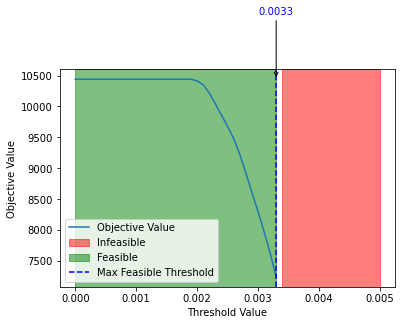

In [99]:
# Plot the results
plt.plot(feasible_thresholds, objective_values, label='Objective Value')

# Infeasible area
if infeasible_thresholds:
    plt.axvspan(min(infeasible_thresholds), max(infeasible_thresholds), alpha=0.5, color='red', label='Infeasible')

# Feasible
if feasible_thresholds:
    plt.axvspan(min(feasible_thresholds), max(feasible_thresholds), alpha=0.5, color='green', label='Feasible')

# Highlight the maximum feasible threshold value
max_feasible_threshold = max(feasible_thresholds)
plt.axvline(max_feasible_threshold, linestyle='--', color='blue', label='Max Feasible Threshold')

#Annotate the maximum feasible threshold value
plt.annotate(
    f"{max_feasible_threshold:.4f}",
    xy=(max_feasible_threshold, max(objective_values)),
    xytext=(max_feasible_threshold, max(objective_values) * 1.1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='blue',
    horizontalalignment='center',
)

#Plot label
plt.xlabel('Threshold Value')
plt.ylabel('Objective Value')
plt.legend()
plt.show()

<b>Exploration model 2 threshold sensitive analysis

In [100]:
# Function to run model with different thresholds
def run_model(threshold):
    # Model information
    num_areas = 21
    max_officers = 9000
    officer_rate = 1.8
    area_name = crime_count['AREA NAME'].unique().tolist()
    population = [175000, 40000, 219136, 182214, 171000, 200000, 300000, 225849, 220000, 187739, 250000, 140000, 200000, 164961, 150000, 165000, 205112, 325000
    , 228000, 196840, 251000] # List of population counts for each area
    num_felonies = crime_count[crime_count['crime_type'] == 'felony']['count'].tolist() # List of felony counts for each area
    num_wobblers = crime_count[crime_count['crime_type'] == 'wobbler']['count'].tolist()# List of wobbler counts for each area
    num_misdemeanors = crime_count[crime_count['crime_type'] == 'misdemeanor']['count'].tolist() # List of misdemeanor counts for each area
    num_infractions = crime_count[crime_count['crime_type'] == 'infraction']['count'].tolist() # List of infraction counts for each area

    weights = {
    'felony': 10,
    'wobbler': 6,
    'misdemeanor': 2,
    'infraction': 1
    }

    weighted_crime_scores = [
    weights['felony'] * num_felonies[i] +
    weights['wobbler'] * num_wobblers[i] +
    weights['misdemeanor'] * num_misdemeanors[i] +
    weights['infraction'] * num_infractions[i]
    for i in range(num_areas)
    ]

    m = gp.Model("police_allocation")

    x = m.addVars(num_areas, vtype="I", name="police_officers")

    m.addConstr(gp.quicksum(x[i] for i in range(num_areas)) == max_officers, name="total_officers")

    for i in range(num_areas):
        min_officers = officer_rate / 1000 * population[i]
        m.addConstr(x[i] >= min_officers, name=f"min_officers_{i}")
    
    #Put value of threshold
    for i in range(num_areas):
        m.addConstr(x[i] >= threshold * weighted_crime_scores[i], name=f"crime_score_threshold_{i}")

    m.setObjective(gp.quicksum(x[i]*weighted_crime_scores[i]/population[i] for i in range(num_areas)), GRB.MAXIMIZE)
    
    #m.Params.TimeLimit = 30
    m.Params.OutputFlag = 0

    m.optimize()
    
    #Return Feasible and Infeasible value
    if m.status == GRB.Status.OPTIMAL:
        objective_value = m.objVal
        return objective_value, True
    else:
        return None, False

In [103]:
# Set threshold range for ploting
thresholds = [i * 0.0001 for i in range(0, 51)] + [0.0018] #Add the maximum threshold value for plot
thresholds.sort()

objective_values = []
feasible_thresholds = []
infeasible_thresholds = []

# Run run_model function for threshold range
for threshold in thresholds:
    obj_value, is_feasible = run_model(threshold)

    if is_feasible:
        objective_values.append(obj_value)
        feasible_thresholds.append(threshold)
    else:
        infeasible_thresholds.append(threshold)


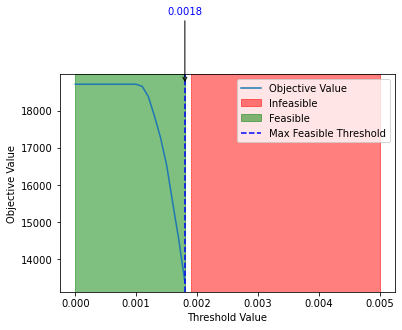

In [102]:
# Plot the results
plt.plot(feasible_thresholds, objective_values, label='Objective Value')

# Infeasible area
if infeasible_thresholds:
    plt.axvspan(min(infeasible_thresholds), max(infeasible_thresholds), alpha=0.5, color='red', label='Infeasible')

# Feasible
if feasible_thresholds:
    plt.axvspan(min(feasible_thresholds), max(feasible_thresholds), alpha=0.5, color='green', label='Feasible')

# Highlight the maximum feasible threshold value
max_feasible_threshold = max(feasible_thresholds)
plt.axvline(max_feasible_threshold, linestyle='--', color='blue', label='Max Feasible Threshold')

#Annotate the maximum feasible threshold value
plt.annotate(
    f"{max_feasible_threshold:.4f}",
    xy=(max_feasible_threshold, max(objective_values)),
    xytext=(max_feasible_threshold, max(objective_values) * 1.1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='blue',
    horizontalalignment='center',
)

#Plot label
plt.xlabel('Threshold Value')
plt.ylabel('Objective Value')
plt.legend()
plt.show()